In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pywt
import cwt2d

from tqdm import tqdm

In [35]:
def imshow(image: np.ndarray, title: str, grayscale: bool = False):
    plt.title(title)
    if grayscale:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.show()

datatype : <class 'numpy.ndarray'>
   shape : (3598, 5397, 3)      # H × W × C


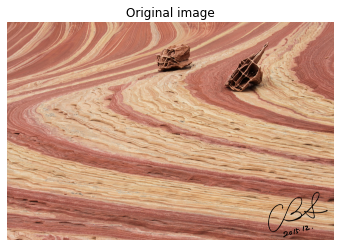

In [36]:
img = imread("./Boneyard_IMG_5341.jpg")
print(f"datatype : {type(img)}")
print(f"   shape : {img.shape}      # H × W × C")

imshow(img, "Original image")

datatype : <class 'numpy.ndarray'>
   shape : (3598, 5397)      # H × W


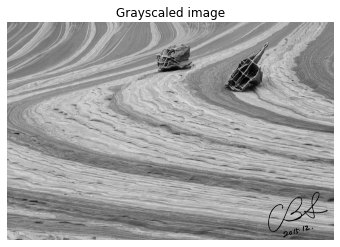

In [37]:
gimg = np.mean(img, axis=-1)

print(f"datatype : {type(gimg)}")
print(f"   shape : {gimg.shape}      # H × W")

imshow(gimg, "Grayscaled image", grayscale=True)

datatype : <class 'numpy.ndarray'>
   shape : (3598, 5397)      # H × W


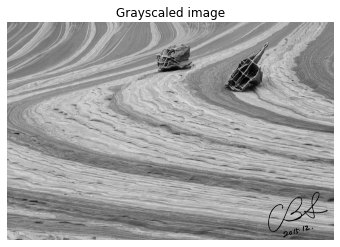

In [38]:
image = imread("./Boneyard_IMG_5341.jpg")
image = np.mean(image, axis=-1)

print(f"datatype : {type(image)}")
print(f"   shape : {image.shape}      # H × W")

imshow(image, "Grayscaled image", grayscale=True)
image = (image - image.min()) / (image.max() - image.min())

In [6]:
# set up a range of scales in logarithmic spacing between 1 and 256 (image width / 2 seems to work ehre)
ss = np.geomspace(1.0,256.0,100)
# calculate the complex pycwt and the wavelet normalizations
coeffs, wav_norm = py_cwt2d.cwt_2d(image, ss, 'mexh')

100%|██████████| 100/100 [06:01<00:00,  3.61s/it]


  0%|          | 0/100 [00:00<?, ?it/s]/home/jklee/anaconda3/envs/HRL/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
100%|██████████| 100/100 [13:38<00:00,  8.19s/it]


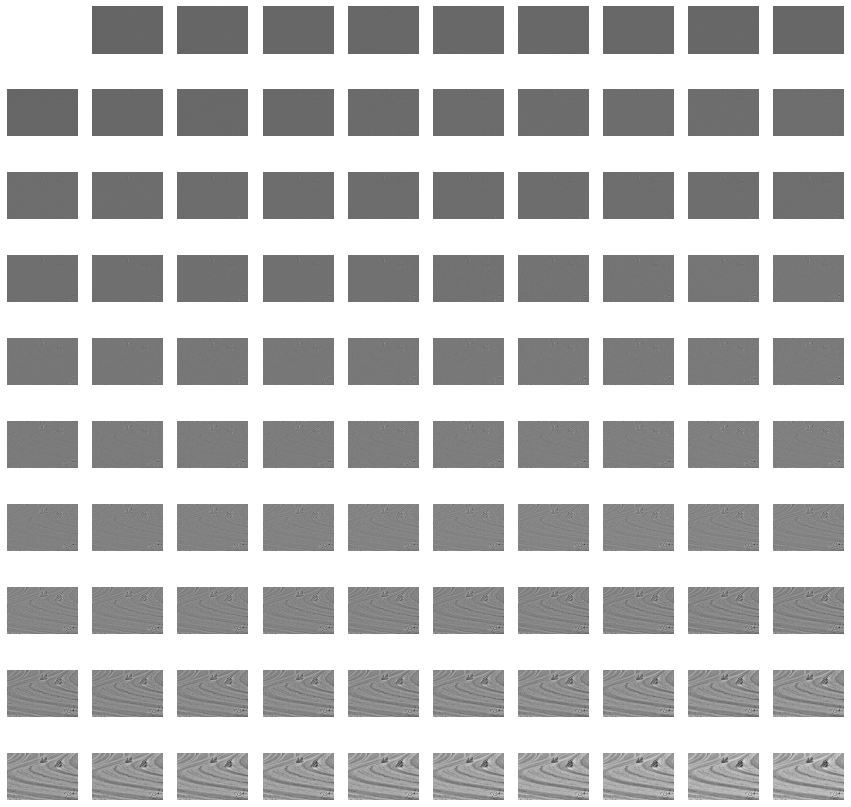

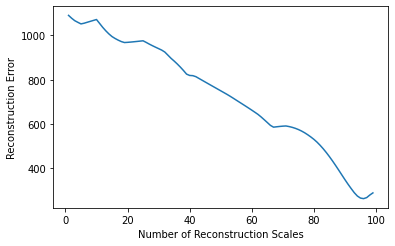

In [8]:
# plot an image showing the combinations of all the scales
errors = []
N = 10
fig, axes = plt.subplots(nrows=N, ncols=N, figsize=(15, 15))
for level in tqdm(range(len(ss))):
    i = level // N
    j = level % N
    plt.sca(axes[i, j])
    plt.axis('off')
    C = 1.0 / (ss[:level] * wav_norm[:level])
    reconstruction = (C * np.real(coeffs[..., :level])).sum(axis=-1)
    reconstruction = 1.0 - (reconstruction - reconstruction.min()) / (reconstruction.max() - reconstruction.min())
    errors.append(np.sqrt(np.sum(np.power(reconstruction - image, 2.0))))
    plt.imshow(reconstruction, cmap='gray')
plt.show()
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(6, 6/1.618))
plt.plot(errors, label='norm')
plt.xlabel('Number of Reconstruction Scales')
plt.ylabel('Reconstruction Error')
plt.show()

In [20]:
best_level = np.argmin(errors[1:])
i = best_level // N
j = best_level % N
C = 1.0 / (ss[:best_level] * wav_norm[:best_level])
best_reconstruction = (C * np.real(coeffs[..., :best_level])).sum(axis=-1)
best_reconstruction = 1.0 - (best_reconstruction - best_reconstruction.min()) / (best_reconstruction.max() - best_reconstruction.min())

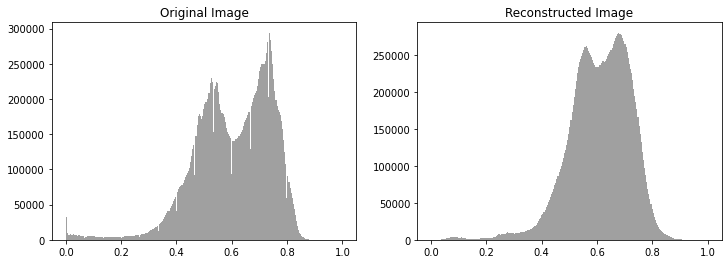

In [21]:
flattened_image = image.flatten()
flattened_r_image = best_reconstruction.flatten()

# Plotting the histogram of original image
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(flattened_image, bins=256, range=[0,1], density=False, color='gray', alpha=0.75)
axes[0].set_title('Original Image')
axes[1].hist(flattened_r_image, bins=256, range=[0,1], density=False, color='gray', alpha=0.75)
axes[1].set_title('Reconstructed Image')
plt.show()

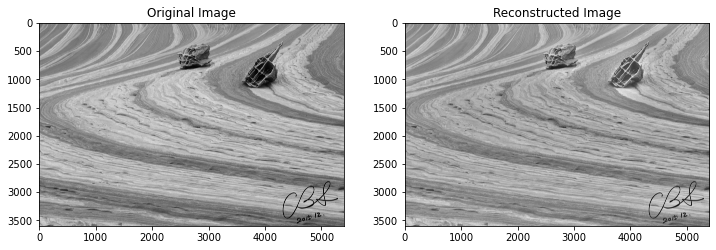

In [22]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(best_reconstruction, cmap='gray')
axes[1].set_title('Reconstructed Image')
plt.show()

In [26]:
# image save
np.save('./wet_reconstructed_img', best_reconstruction)

In [27]:
# image load
best_reconstruction_load = np.load('./wet_reconstructed_img.npy')

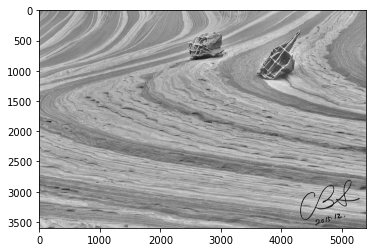

In [29]:
# plot loaded image
plt.imshow(best_reconstruction_load, cmap='gray')
plt.show()